In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

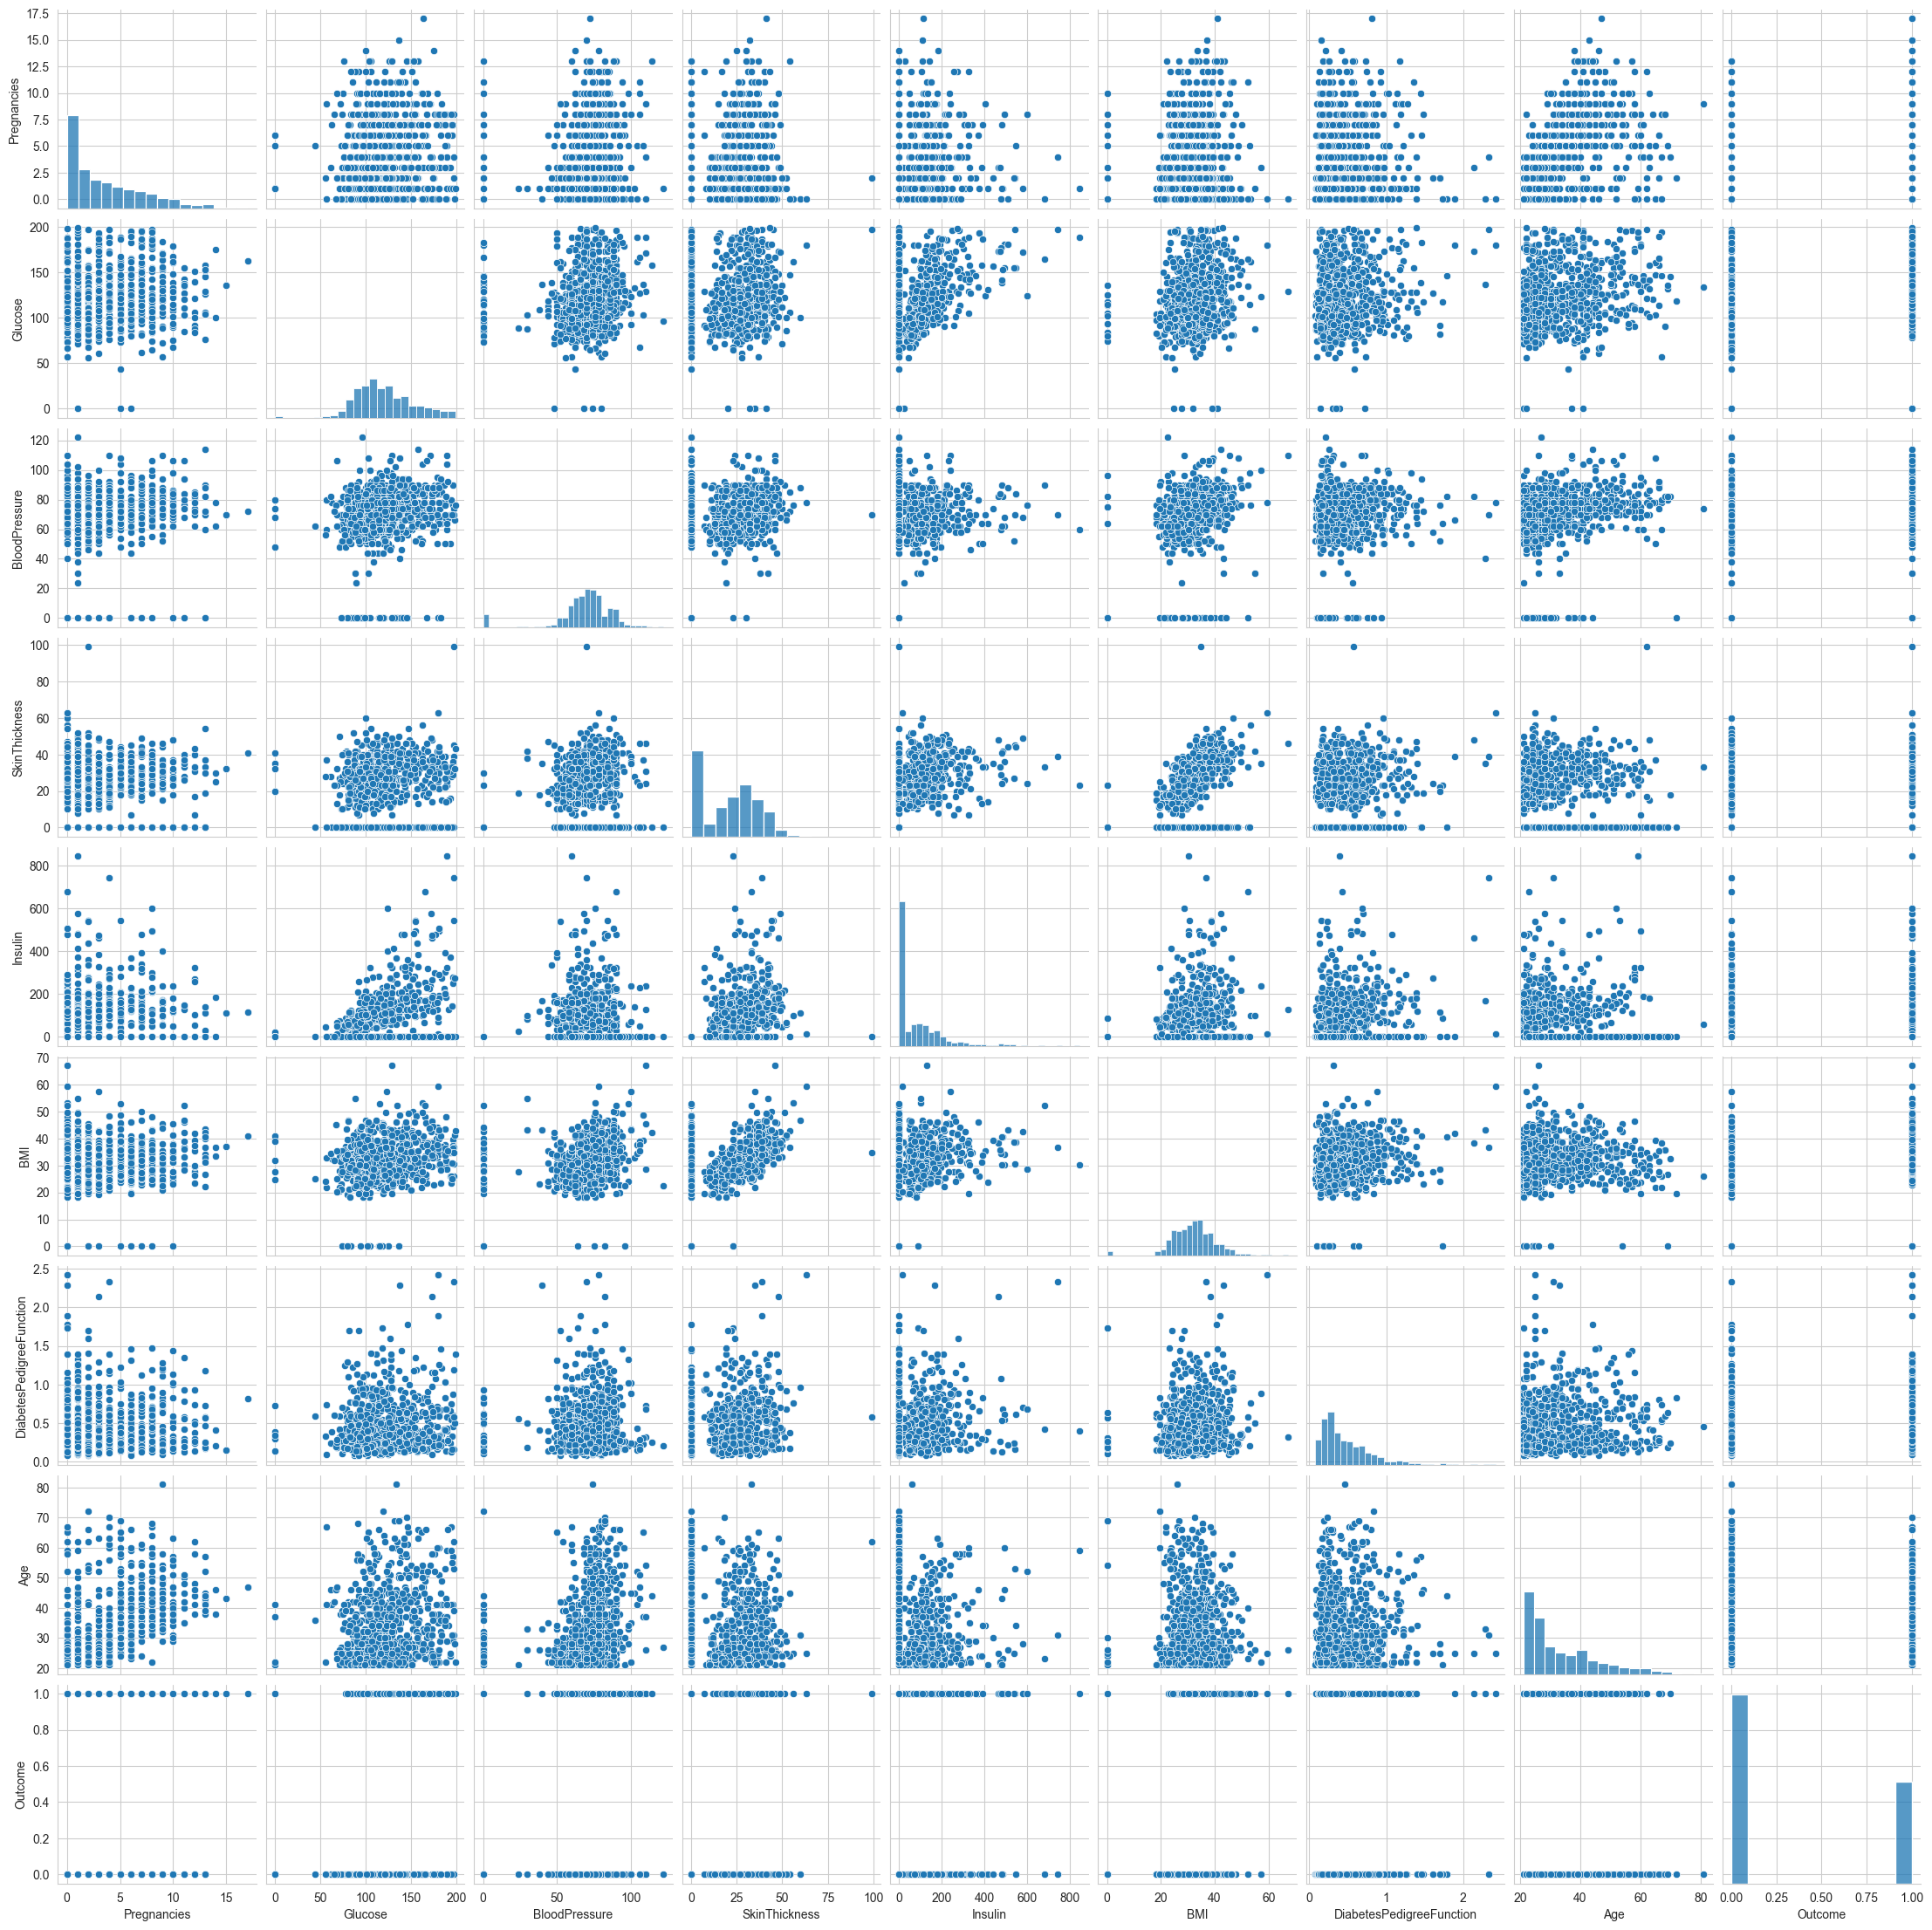

In [103]:
sns.pairplot(data=df)

<Axes: >

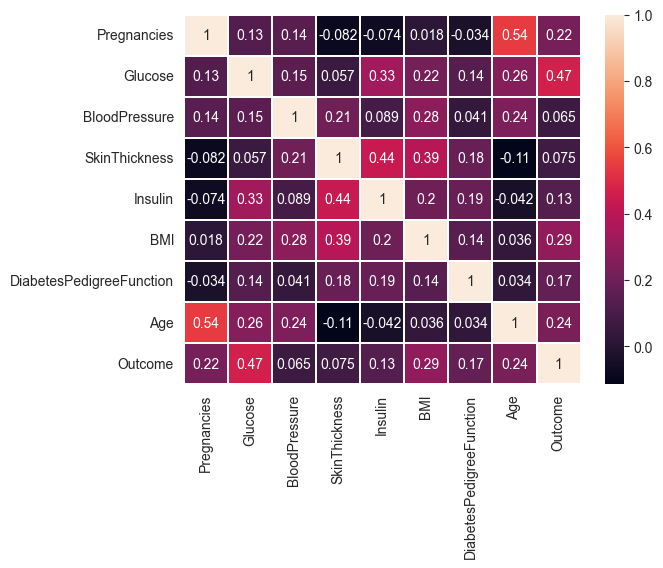

In [104]:
fig, ax = plt.subplots()
sns.heatmap(data=df.corr(), annot=True, linewidths=0.2)

Since there isn't any high positive or negative correlation between the features, dimensionality reduction like PCA is not required. Anyways we will try using it also in later part of this notebook.

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Outcome'], df['Outcome'], test_size=0.2)
x_train.shape

(614, 8)

In [106]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale_x = scale.fit_transform(x_train)
scale_x

array([[-1.16036564, -0.44536491, -0.3548135 , ...,  0.58062322,
         0.85496063, -0.70183143],
       [-1.16036564,  0.50138888, -0.0464547 , ..., -0.87273016,
        -0.9954139 , -1.04027597],
       [ 1.25476826, -0.95030026,  0.67304915, ...,  0.45745768,
         0.34264195,  2.93644729],
       ...,
       [-1.16036564,  0.59606426, -0.2006341 , ...,  1.31961647,
        -0.12748578, -0.78644257],
       [ 1.55666   ,  1.0378827 ,  0.46747662, ..., -0.12142036,
        -0.93212747,  0.99039123],
       [ 3.06611869,  1.70061035, -0.3548135 , ...,  0.2111266 ,
        -0.78747278,  0.3981133 ]])

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [108]:
lr = LogisticRegression(random_state=10)
parameters = {'C' : [0.1, 1, 10]}
clf = GridSearchCV(estimator=lr, cv=5, param_grid=parameters, scoring='roc_auc')
clf.fit(scale_x, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=10),
             param_grid={'C': [0.1, 1, 10]}, scoring='roc_auc')

In [109]:
print(clf.best_estimator_)

LogisticRegression(C=0.1, random_state=10)


In [110]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005559,0.006913,0.000000,0.000000,0.1,{'C': 0.1},0.779056,0.819186,0.795058,0.878779,0.803650,0.815146,0.034362,1
1,0.006292,0.007706,0.000000,0.000000,1,{'C': 1},0.777618,0.819186,0.790988,0.880523,0.804828,0.814629,0.035742,2
2,0.004581,0.004006,0.000899,0.001798,10,{'C': 10},0.778193,0.819477,0.790407,0.879360,0.805122,0.814512,0.035265,3


In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lr = LogisticRegression(C=0.1)
lr.fit(scale_x, y_train)
pred = lr.predict(scale.transform(x_test))

Text(0.5, 1.0, 'roc curve')

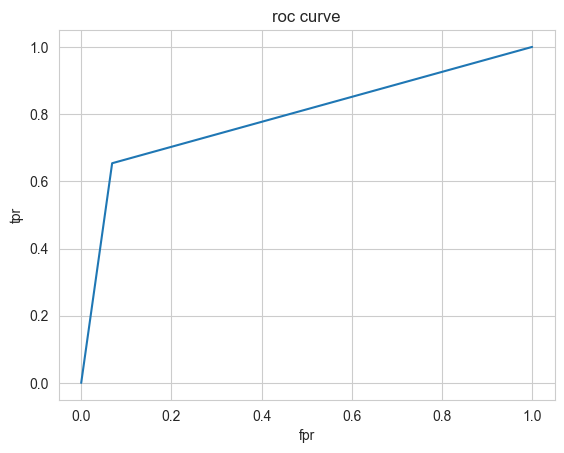

In [112]:
fpr, tpr, threshold = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')

([<matplotlib.axis.XTick at 0x2234bfc51d0>,
 [Text(0.5, 0, 'Predicted True'), Text(1.5, 0, 'Predicted False')])

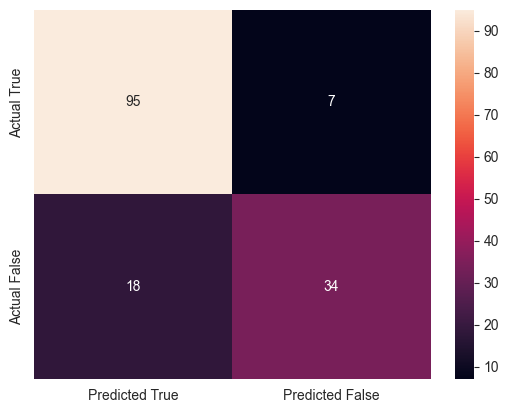

In [113]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.yticks([0.5,1.5], ['Actual True', 'Actual False'])
plt.xticks([0.5, 1.5], ['Predicted True', 'Predicted False'])

In [114]:
roc_auc_score(y_test, pred)

0.7926093514328808

Logistic regression doesn't perform well with this data set, lets go for the next one

In [115]:
svm = SVC(random_state=10)
parameters = {'gamma': [0.01, 0.1, 1, 10, 100], 'C' : [0.1, 1, 10], 'kernel' : ['linear', 'rbf']}
clf = GridSearchCV(estimator=svm, cv=5, param_grid=parameters, scoring='roc_auc')
clf.fit(scale_x, y_train)
clf.best_estimator_

SVC(C=1, gamma=0.01, random_state=10)

In [116]:
temp = pd.DataFrame(clf.cv_results_)
temp[temp['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,0.008948,0.007384,0.013891,0.012337,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.77244,0.821802,0.800581,0.875872,0.808066,0.815752,0.034106,1


In [145]:
svm = SVC(C=10, gamma=0.01, kernel='rbf', random_state=10)
svm.fit(scale_x, y_train)
pred = svm.predict(scale.transform(x_test))

([<matplotlib.axis.XTick at 0x2234d616b50>,
 [Text(0.5, 0, 'Predicted True'), Text(1.5, 0, 'Predicted False')])

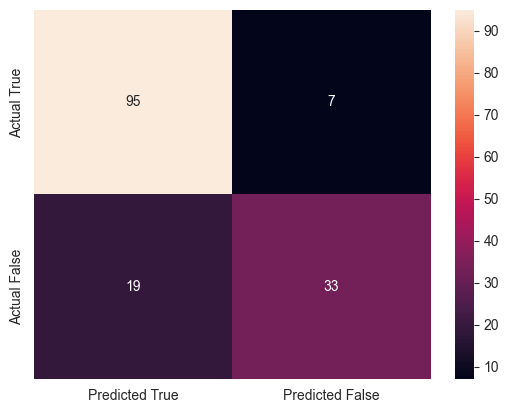

In [146]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.yticks([0.5,1.5], ['Actual True', 'Actual False'])
plt.xticks([0.5, 1.5], ['Predicted True', 'Predicted False'])

Text(0.5, 1.0, 'roc curve')

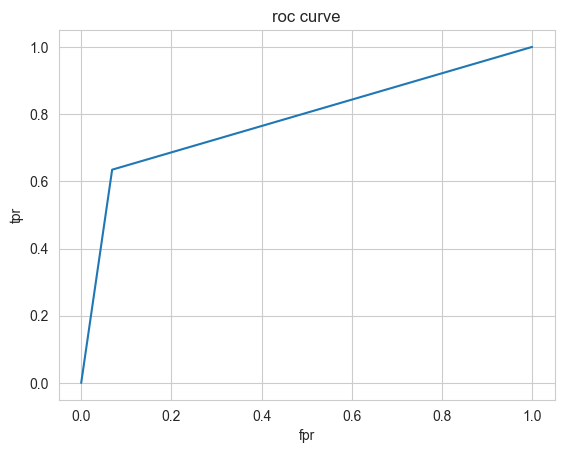

In [119]:
fpr, tpr, threshold = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')

In [120]:
from sklearn.metrics import classification_report
classification_report(y_test, pred, target_names=['diabetes','normal'])

'              precision    recall  f1-score   support\n\n    diabetes       0.83      0.93      0.88       102\n      normal       0.82      0.63      0.72        52\n\n    accuracy                           0.83       154\n   macro avg       0.83      0.78      0.80       154\nweighted avg       0.83      0.83      0.82       154\n'

In [167]:
n_estimators = [1, 5, 10, 25, 100]
min_sample_leaf = [5, 10, 15, 20, 25]
best_score = 0
best_estimator = {}
for i in n_estimators:
    for j in min_sample_leaf:
        rf = RandomForestClassifier(n_estimators = i, min_samples_leaf= j, random_state=10)
        rf.fit(scale_x, y_train)
        score = roc_auc_score(y_test, rf.predict(scale.transform(x_test)))
        if score > best_score:
            best_estimator['n_estimator'] = i
            best_estimator['min_sample_leaf'] = j
print(best_estimator)

{'n_estimator': 100, 'min_sample_leaf': 25}


In [168]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=25)
rf.fit(scale_x, y_train)
pred = rf.predict(scale.transform(x_test))

([<matplotlib.axis.XTick at 0x2234eb925d0>,
 [Text(0.5, 0, 'Predicted True'), Text(1.5, 0, 'Predicted False')])

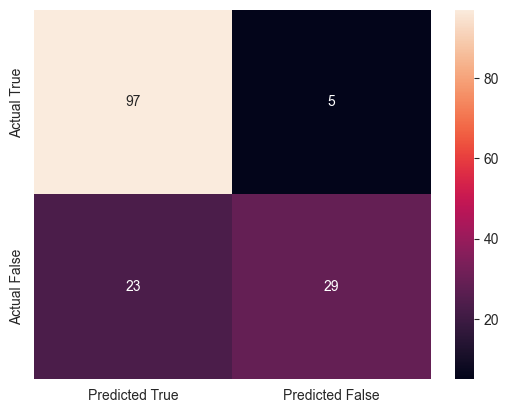

In [169]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.yticks([0.5,1.5], ['Actual True', 'Actual False'])
plt.xticks([0.5, 1.5], ['Predicted True', 'Predicted False'])

Text(0.5, 1.0, 'roc curve')

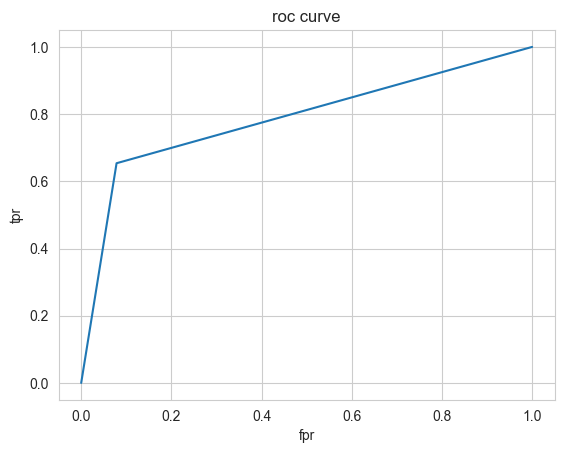

In [124]:
fpr, tpr, threshold = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('roc curve')

In [125]:
classification_report(y_test, pred, target_names=['diabetes','normal'])

'              precision    recall  f1-score   support\n\n    diabetes       0.84      0.92      0.88       102\n      normal       0.81      0.65      0.72        52\n\n    accuracy                           0.83       154\n   macro avg       0.82      0.79      0.80       154\nweighted avg       0.83      0.83      0.83       154\n'

In [126]:
roc_auc_score(y_test, pred)

0.7877073906485671

Now let us try increaing the accuracy be reducing the number of features

In [127]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(scale_x)

PCA(n_components=3)

In [129]:

pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [130]:
pca_transform = pca.transform(scale_x)
pca_transform

array([[-0.00434271, -1.59607091,  0.02995394],
       [-0.84879451, -1.01918494,  0.35773307],
       [ 0.25096854,  3.02314494, -0.53221422],
       ...,
       [ 0.62972401, -1.53563853, -0.03324629],
       [ 1.13010142,  1.62694959, -0.27871204],
       [ 1.02310558,  2.31423082,  0.02011431]])

In [131]:
lr = LogisticRegression(random_state = 10)
lr.fit(pca_transform, y_train)
pred = lr.predict(pca.transform(scale.transform(x_test)))
roc_auc_score(y_test, pred)

0.7203996983408749

([<matplotlib.axis.XTick at 0x2234d43bd90>,
 [Text(0.5, 0, 'Predicted True'), Text(1.5, 0, 'Predicted False')])

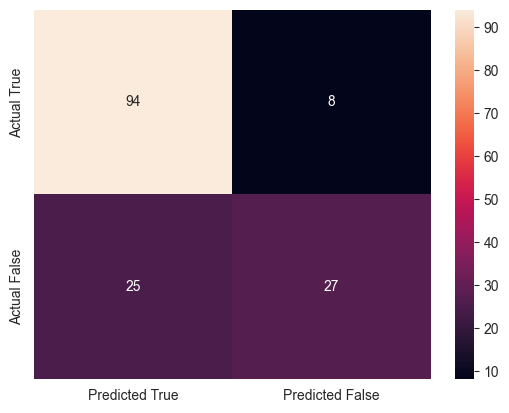

In [132]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.yticks([0.5,1.5], ['Actual True', 'Actual False'])
plt.xticks([0.5, 1.5], ['Predicted True', 'Predicted False'])

In [133]:
svm = SVC(C=1, gamma=0.1, kernel='rbf', random_state=10)
svm.fit(pca_transform, y_train)
pred = svm.predict(pca.transform(scale.transform(x_test)))
roc_auc_score(y_test, pred)

0.6966440422322775

([<matplotlib.axis.XTick at 0x2234d2b5610>,
 [Text(0.5, 0, 'Predicted True'), Text(1.5, 0, 'Predicted False')])

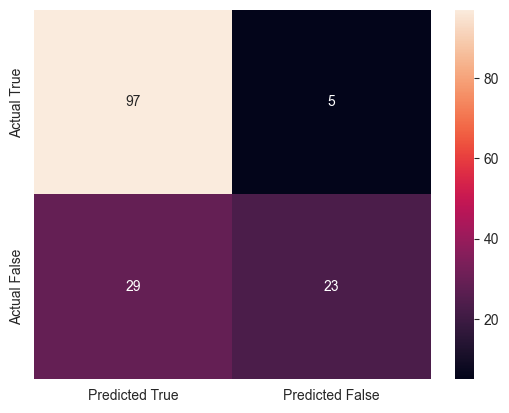

In [134]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.yticks([0.5,1.5], ['Actual True', 'Actual False'])
plt.xticks([0.5, 1.5], ['Predicted True', 'Predicted False'])

In [158]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=25, random_state=10)
rf.fit(pca_transform, y_train)
pred = rf.predict(pca.transform(scale.transform(x_test)))
roc_auc_score(y_test, pred)

0.7015460030165912

([<matplotlib.axis.XTick at 0x2234ec74ed0>,
 [Text(0.5, 0, 'Predicted True'), Text(1.5, 0, 'Predicted False')])

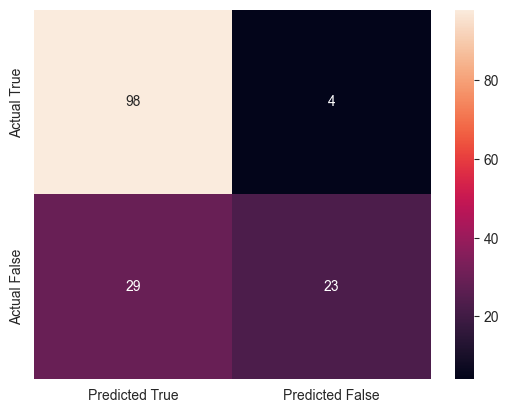

In [159]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.yticks([0.5,1.5], ['Actual True', 'Actual False'])
plt.xticks([0.5, 1.5], ['Predicted True', 'Predicted False'])

Clearly reducing the number of features doesn't increase the accuracy. But one plus point is that, false negatives has reduced very much

Now let us try by increasing the number of features

In [137]:
from sklearn.preprocessing import PolynomialFeatures

In [138]:
poly = PolynomialFeatures(2)
poly.fit(scale_x)
poly_transform = poly.transform(scale_x)
poly_transform

array([[ 1.        , -1.16036564, -0.44536491, ...,  0.73095769,
        -0.60003825,  0.49256736],
       [ 1.        , -1.16036564,  0.50138888, ...,  0.99084882,
         1.03550515,  1.08217409],
       [ 1.        ,  1.25476826, -0.95030026, ...,  0.11740351,
         1.00615003,  8.62272267],
       ...,
       [ 1.        , -1.16036564,  0.59606426, ...,  0.01625262,
         0.10026024,  0.61849191],
       [ 1.        ,  1.55666   ,  1.0378827 , ...,  0.86886162,
        -0.92317087,  0.98087478],
       [ 1.        ,  3.06611869,  1.70061035, ...,  0.62011339,
        -0.31350338,  0.1584942 ]])

In [139]:
lr = LogisticRegression(random_state = 10)
lr.fit(poly_transform, y_train)
pred = lr.predict(poly.transform(scale.transform(x_test)))
roc_auc_score(y_test, pred)

0.7680995475113122

([<matplotlib.axis.XTick at 0x2234d52f350>,
 [Text(0.5, 0, 'Predicted True'), Text(1.5, 0, 'Predicted False')])

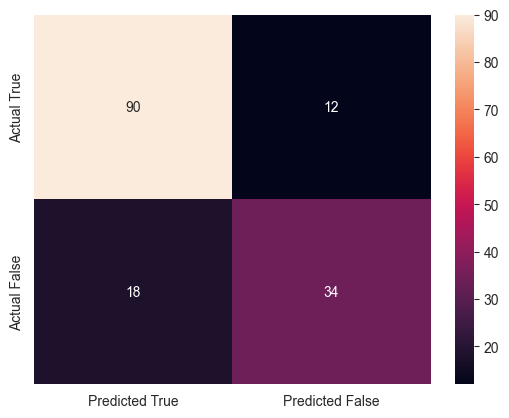

In [140]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.yticks([0.5,1.5], ['Actual True', 'Actual False'])
plt.xticks([0.5, 1.5], ['Predicted True', 'Predicted False'])

In [141]:
svm = SVC(C=1, gamma=0.1, kernel='rbf', random_state=10)
svm.fit(poly_transform, y_train)
pred = svm.predict(poly.transform(scale.transform(x_test)))
roc_auc_score(y_test, pred)

0.6481900452488688

([<matplotlib.axis.XTick at 0x2234d537650>,
 [Text(0.5, 0, 'Predicted True'), Text(1.5, 0, 'Predicted False')])

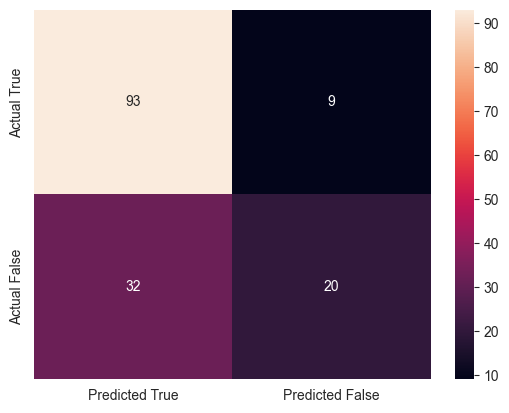

In [142]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.yticks([0.5,1.5], ['Actual True', 'Actual False'])
plt.xticks([0.5, 1.5], ['Predicted True', 'Predicted False'])

In [160]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=25, random_state=10)
rf.fit(poly_transform, y_train)
pred = rf.predict(poly.transform(scale.transform(x_test)))
roc_auc_score(y_test, pred)

0.7111613876319759

([<matplotlib.axis.XTick at 0x2234ecff390>,
 [Text(0.5, 0, 'Predicted True'), Text(1.5, 0, 'Predicted False')])

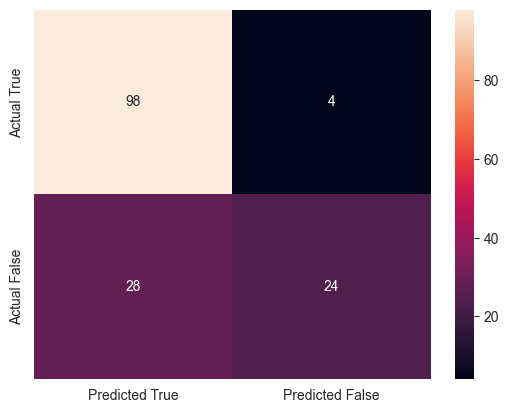

In [161]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)
plt.yticks([0.5,1.5], ['Actual True', 'Actual False'])
plt.xticks([0.5, 1.5], ['Predicted True', 'Predicted False'])

Overall the models which performs the best is a randomforest classifier with n_estimators = 100 and min_samples_leaf = 25, under 3 principle components